# Problem Set 5, Part Two: Due Tuesday, March 4 by 8am Eastern Standard Time

## Name: David Millard

**Show your work on all problems!** Be sure to give credit to any
collaborators, or outside sources used in solving the problems. Note
that if using an outside source to do a calculation, you should use it
as a reference for the method, and actually carry out the calculation
yourself; it’s not sufficient to quote the results of a calculation
contained in an outside source.

Fill in your solutions in the notebook below, inserting markdown and/or code cells as needed.  Try to do reasonably well with the typesetting, but don't feel compelled to replicate my formatting exactly.  **You do NOT need to make random variables blue!**

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0,5.0)
plt.rcParams['font.size'] = 14

### ROC Curve for Signed Rank Test

Consider paired samples of size $n=100$, whose differences are $\{d_i\}$.  Assuming the differences to be drawn from a symmetrical distribution whose mean is defined, we wish to construct the ROC curves for three families of tests, each of which evaluates the null hypothesis that the distribution of the differences has zero mean (which means zero median under the assumptions stated) against the alternative hypothesis that the mean and median are positive:
1. The signed rank test
2. The sign test
3. The paired $t$-test

**(a)** Normal Sampling Distribution

Suppose that the null sampling distribution is $N(0,1)$ and the alternative sampling distribution is $N(\theta,1)$ where $\theta=0.1$.

We generate $N=10^4$ standard normal samples of size $n=100$ as in the previous problem set.  These will represent the differences $d^{(I)}_i=y^{(I)}_i-x^{(I)}_i$ where $I=1,\ldots,N$ labels the Monte Carlo iteration and $i=1,\ldots,n$ labels the variables in the sample.  If $d^{(I)}_i$ is a set of standard normal samples, $d^{(I)}_i + \theta$ is a set of samples from $N(\theta,1)$.

In [12]:
N = 10**4
n = 100
theta = 0.1
np.random.seed(202503041)
d_Ii = stats.norm.rvs(size=(N,n))

Now we calculate the signed rank statistic $T^{+}_0{}^{(I)}$ from the $I$th sample drawn from the null distribution, and call it `Tp0_I`.

In [13]:
R0_Ii = stats.rankdata(np.abs(d_Ii),axis=-1)
Tp0_I = np.sum(R0_Ii*(d_Ii>0),axis=-1)

Likewise we calculate the signed rank statistic $T^{+}_1{}^{(I)}$ from the $I$th sample drawn from the alternative distribution, and call it `Tp1_I`.

In [14]:
R1_Ii = stats.rankdata(np.abs(d_Ii+theta),axis=-1)
Tp1_I = np.sum(R1_Ii*(d_Ii>-theta),axis=-1)

Now we define a vector of all possible threshold values, and construct the significance and power of a test which rejects the null hypothesis when the sum of the positive ranks exceeds each of the thresholds.

In [15]:
cmin = 0
cmax = n*(n+1) // 2
csr_c = np.arange(cmin,cmax+2)
alphasr_c = np.mean(Tp0_I[None,:]>=csr_c[:,None],axis=-1)
gammasr_c = np.mean(Tp1_I[None,:]>=csr_c[:,None],axis=-1)

Performing computations analogous to those in the class notes, define a vector of possible thresholds for the sign test and calculate the significance $\alpha_s$ and power $\gamma_s$ at each possible threshold.  (You can either use the the analytic probabilities of the binomial distribution as in the notes or the Monte Carlo data.)

In [16]:
cs_c = np.arange(-1,n+1); cs_c

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

In [20]:
p0 = 0.5; alphas_c = stats.binom(n,p0).sf(cs_c); alphas_c

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 9.99999999e-01, 9.99999998e-01, 9.99999992e-01,
       9.99999972e-01, 9.99999909e-01, 9.99999718e-01, 9.99999166e-01,
       9.99997654e-01, 9.99993710e-01, 9.99983920e-01, 9.99960749e-01,
       9.99908428e-01, 9.99795611e-01, 9.99563140e-01, 9.99105035e-01,
       9.98241179e-01, 9.96681440e-01, 9.93983512e-01, 9.89510632e-01,
       9.82399900e-01, 9.71556033e-01, 9.55686960e-01, 9.33394690e-01,
       9.03326048e-01, 8.64373488e-01, 8.15899191e-01, 7.57940793e-01,
       6.91350293e-01, 6.17823283e-01, 5.39794619e-01, 4.60205381e-01,
       3.82176717e-01, 3.08649707e-01, 2.42059207e-01, 1.84100809e-01,
      

In [21]:
p1 = stats.norm(loc=theta).sf(0); p1

0.539827837277029

In [22]:
gammas_c = stats.binom(n,p1).sf(cs_c); gammas_c

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 9.99999999e-01, 9.99999996e-01, 9.99999988e-01,
       9.99999960e-01, 9.99999874e-01, 9.99999625e-01, 9.99998933e-01,
       9.99997100e-01, 9.99992465e-01, 9.99981258e-01, 9.99955353e-01,
       9.99898048e-01, 9.99776669e-01, 9.99530373e-01, 9.99051359e-01,
       9.98158031e-01, 9.96559889e-01, 9.93816309e-01, 9.89295092e-01,
       9.82141077e-01, 9.71269140e-01, 9.55397661e-01, 9.33136020e-01,
       9.03131409e-01, 8.64266507e-01, 8.15882730e-01, 7.57988554e-01,
       6.91404591e-01, 6.17801288e-01, 5.39602935e-01, 4.59759974e-01,
      

Performing computations analogous to those in the class notes, define a vector of possible thresholds for the paired $t$ test and calculate the significance $\alpha_t$ and power $\gamma_t$ at each possible threshold.  (You can either use the the Monte Carlo data as in the notes, or approximate analytically using the central limit theorem.)

In [25]:
xbar_I = np.mean(d_Ii,axis=-1) 
s_I = np.std(d_Ii,ddof=1,axis=-1)

t0_I = xbar_I / (s_I/np.sqrt(n))
t1_I = (xbar_I+theta) / (s_I/np.sqrt(n))

In [26]:
cmin = -3; cmax = 3 + theta * np.sqrt(n); ct_c = np.linspace(cmin,cmax,1000)

In [27]:
alphat_c = np.mean(t0_I[None,:] >= ct_c[:,None], axis=-1)
gammat_c = np.mean(t1_I[None,:] >= ct_c[:,None], axis=-1)

On the same set of axes, plot the ROC curves ($\alpha$ versus $\gamma$) for the three tests considered.  Plot the sign test with a solid blue line, the paired $t$-test with a dashed green line, and the signed rank test with a dot-dashed red line.  Label your axes and include a legend, as in the class notes

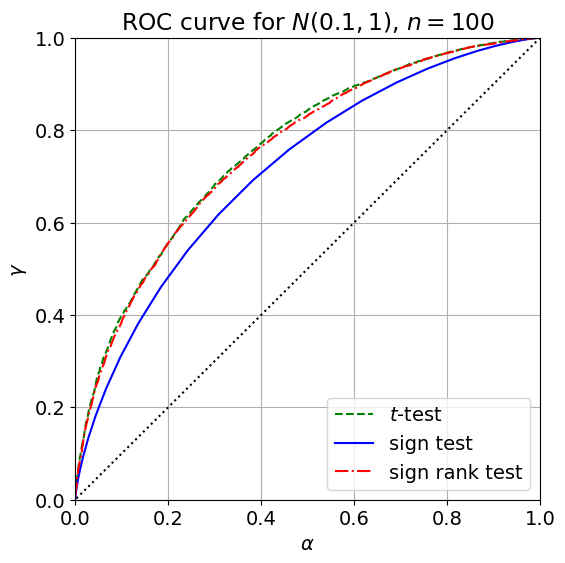

In [42]:
plt.figure(figsize=(6,6)); 

plt.plot(alphas_c,alphas_c,'k:');
plt.plot(alphat_c,gammat_c,'--', color='g',label=r'$t$-test');
plt.plot(alphas_c,gammas_c,'-', color='b',label='sign test');
plt.plot(alphasr_c,gammasr_c,'-.', color='r',label='sign rank test');

plt.xlabel(r'$\alpha$');plt.ylabel(r'$\gamma$');plt.title(r'ROC curve for $N(%.1f,1)$, $n=%d$' % (theta,n));
plt.grid();plt.legend(loc='lower right');plt.xlim(0,1);plt.ylim(0,1);

**(b)** Laplace (double exponential) Sampling Distribution

Repeat the steps of part (a) to produce a comparison among the ROC curves for the three tests when the sampling distribution is a Laplace distribution with location parameter $\theta$ and scale parameter $1/\sqrt{2}$, as defined by `scipy.stats`.

In [54]:
np.random.seed(202503042)
d_Ii = stats.laplace(scale=np.sqrt(0.5)).rvs(size=(N,n))

In [55]:
# sign rank

R0_Ii = stats.rankdata(np.abs(d_Ii),axis=-1)
Tp0_I = np.sum(R0_Ii*(d_Ii>0),axis=-1)

R1_Ii = stats.rankdata(np.abs(d_Ii+theta),axis=-1)
Tp1_I = np.sum(R1_Ii*(d_Ii>-theta),axis=-1)

cmin = 0
cmax = n*(n+1) // 2
csr_c = np.arange(cmin,cmax+2)
alphasr_c = np.mean(Tp0_I[None,:]>=csr_c[:,None],axis=-1)
gammasr_c = np.mean(Tp1_I[None,:]>=csr_c[:,None],axis=-1)

In [56]:
# sign

cs_c = np.arange(-1,n+1)

p0 = 0.5; alphas_c = stats.binom(n,p0).sf(cs_c)

p1 = stats.laplace(loc=theta, scale=np.sqrt(0.5)).sf(0)

gammas_c = stats.binom(n,p1).sf(cs_c)

In [57]:
# t-test

xbar_I = np.mean(d_Ii,axis=-1) 
s_I = np.std(d_Ii,ddof=1,axis=-1)

t0_I = xbar_I / (s_I/np.sqrt(n))
t1_I = (xbar_I+theta) / (s_I/np.sqrt(n))

cmin = -3; cmax = 3 + theta * np.sqrt(n); ct_c = np.linspace(cmin,cmax,1000)

alphat_c = np.mean(t0_I[None,:] >= ct_c[:,None], axis=-1)
gammat_c = np.mean(t1_I[None,:] >= ct_c[:,None], axis=-1)

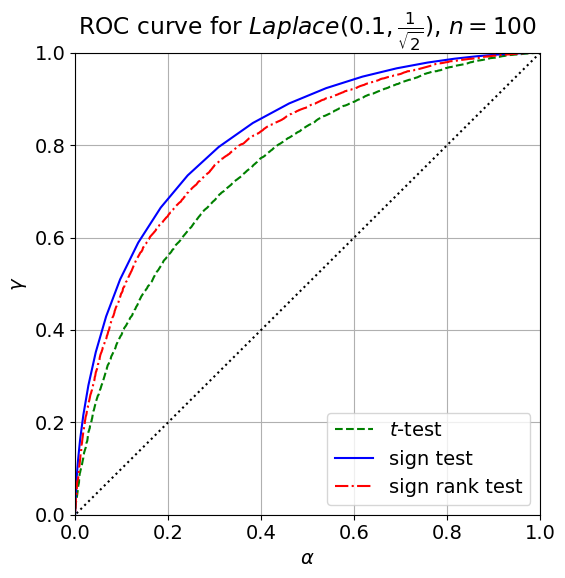

In [61]:
# plot

plt.figure(figsize=(6,6)); 

plt.plot(alphas_c,alphas_c,'k:');
plt.plot(alphat_c,gammat_c,'--', color='g',label=r'$t$-test');
plt.plot(alphas_c,gammas_c,'-', color='b',label='sign test');
plt.plot(alphasr_c,gammasr_c,'-.', color='r',label='sign rank test');

plt.xlabel(r'$\alpha$');plt.ylabel(r'$\gamma$');
plt.title(r'ROC curve for $Laplace(%.1f,\frac{1}{\sqrt{2}})$, $n=%d$' % (theta,n));
plt.grid();plt.legend(loc='lower right');plt.xlim(0,1);plt.ylim(0,1);